# **Final Project Task 1 - Census Data Preprocess**

Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data
- Handle missing values if any
- Correct errors, inconsistencies, remove duplicates if any
- Outlier detection and treatment if any
- Normalization / Standardization if necesarry
- Feature engineering
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [1]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [3]:
print(data.isnull().sum())

data.dropna(inplace=True)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [4]:
data.drop_duplicates(inplace=True)

categorical_columns = data.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Unique values in education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Unique values in marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Unique values in occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Unique values in relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
Unique values in race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
Unique values in sex: ['Male' 'Female

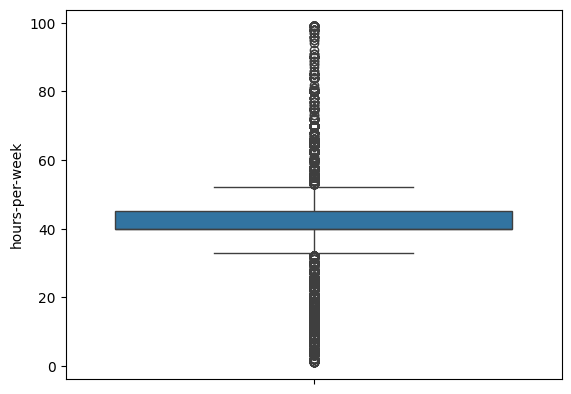

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data["hours-per-week"])
plt.show()

lower_bound = data["hours-per-week"].quantile(0.01)
upper_bound = data["hours-per-week"].quantile(0.99)
data["hours-per-week"] = data["hours-per-week"].clip(lower_bound, upper_bound)

In [6]:
data = pd.get_dummies(data, drop_first=True)

In [7]:
from sklearn.preprocessing import StandardScaler

numerical_features = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss"]
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [8]:
data["total-capital"] = data["capital-gain"] - data["capital-loss"]

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop("hours-per-week", axis=1)
y = data["hours-per-week"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [11]:
data.head()

age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.030390 -1.063569       1.134777      0.148292     -0.216743   
1  0.836973 -1.008668       1.134777     -0.145975     -0.216743   
2 -0.042936  0.245040      -0.420679     -0.145975     -0.216743   
3  1.056950  0.425752      -1.198407     -0.145975     -0.216743   
4 -0.776193  1.408066       1.134777     -0.145975     -0.216743   

   hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
0              40                  False                False   
1              13                  False                False   
2              40                  False                False   
3              40                  False                False   
4              40                  False                False   

   workclass_Never-worked  workclass_Private  ...  native-country_Scotland  \
0                   False              False  ...                    False   
1                   False              False  ...                    False   
2                   False               True  ...                    False   
3                   False               True  ...                    False   
4                   False               True  ...                    False   

   native-country_South  native-country_Taiwan  native-country_Thailand  \
0                 False                  False                    False   
1                 False                  False                    False   
2                 False                  False                    False   
3                 False                  False                    False   
4                 False                  False                    False   

   native-country_Trinadad&Tobago  native-country_United-States  \
0                           False                          True   
1                           False                          True   
2                           False                          True   
3                           False                          True   
4                           False                         False   

   native-country_Vietnam  native-country_Yugoslavia  income_>50K  \
0                   False                      False        False   
1                   False                      False        False   
2                   False                      False        False   
3                   False                      False        False   
4                   False                      False        False   

   total-capital  
0       0.365035  
1       0.070768  
2       0.070768  
3       0.070768  
4       0.070768  

[5 rows x 102 columns]